###PCA analysis

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
# import torch
# import torch.nn as nn
# import torch.nn.functional as fun

In [5]:
ca_whole = pd.read_csv('ca_whole.csv')

In [6]:
# Drop Outlier
max_aqi = np.mean(ca_whole['AQI'])+2*np.std(ca_whole['AQI'])
min_aqi = np.mean(ca_whole['AQI'])-2*np.std(ca_whole['AQI'])
ca_whole = ca_whole.loc[ca_whole['AQI']<=max_aqi]

In [7]:
ca_whole

,County Name,Date Local,AQI,Category,Latitude,Longitude,AQI_so2,Arithmetic Mean_so2,1st Max Value_so2,AQI_no2,...,AQI_co,Arithmetic Mean_co,1st Max Value_co,AQI_ozone,Arithmetic Mean_ozone,1st Max Value_ozone,Arithmetic Mean_temp,1st Max Value_temp,Arithmetic Mean_wind,1st Max Value_wind
0,Fresno,2020-01-01,130,Unhealthy for Sensitive Groups,36.710833,-119.777500,0.0,0.129166,0.25,21.4,...,9.333333,0.563523,0.946333,23.833333,0.014519,0.025833,82.127344,171.83750,48.035417,58.1750
1,Fresno,2020-01-02,102,Unhealthy for Sensitive Groups,36.785380,-119.773210,0.0,0.052084,0.15,19.2,...,8.000000,0.520751,0.773167,18.166667,0.010873,0.019667,74.927604,169.61250,47.408333,54.7000
2,Fresno,2020-01-03,88,Moderate,36.785380,-119.773210,0.0,0.127084,0.25,27.0,...,8.333333,0.531785,0.850333,21.333333,0.013696,0.023167,59.380208,138.78125,50.284375,64.2500
3,Fresno,2020-01-04,66,Moderate,36.726390,-119.733000,0.0,0.043750,0.15,15.8,...,7.000000,0.342258,0.569833,26.500000,0.019961,0.028667,115.795833,177.00625,52.025000,63.8000
4,Fresno,2020-01-05,55,Moderate,36.785380,-119.773210,0.0,0.000000,0.00,8.8,...,3.333333,0.233755,0.320667,21.500000,0.017775,0.023333,116.238802,173.69375,46.796354,56.9125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,Santa Clara,2020-12-27,47,Good,37.338135,-121.849783,1.0,0.269048,1.05,20.0,...,9.500000,0.513865,0.921750,29.250000,0.021691,0.031250,80.337500,143.45000,50.750000,61.0000
3045,Santa Clara,2020-12-28,39,Good,37.338135,-121.849783,0.0,0.063095,0.25,24.5,...,7.000000,0.454125,0.721750,26.750000,0.016103,0.028750,137.173530,179.50000,50.470588,56.0000
3046,Santa Clara,2020-12-29,53,Moderate,37.338135,-121.849783,0.0,0.213095,0.45,28.0,...,9.500000,0.643625,1.032500,21.250000,0.013103,0.023250,81.280000,112.60000,44.400000,49.0000
3047,Santa Clara,2020-12-30,55,Moderate,37.338135,-121.849783,0.0,0.128421,0.35,26.0,...,12.000000,0.655126,1.077750,19.250000,0.014544,0.020500,107.839583,180.50000,47.000000,57.0000


In [9]:
ca_whole.columns
ca_whole['Date Local'.name]

Index(['County Name', 'Date Local', 'AQI', 'Category', 'Latitude', 'Longitude',
       'AQI_so2', 'Arithmetic Mean_so2', '1st Max Value_so2', 'AQI_no2',
       'Arithmetic Mean_no2', '1st Max Value_no2', 'AQI_co',
       'Arithmetic Mean_co', '1st Max Value_co', 'AQI_ozone',
       'Arithmetic Mean_ozone', '1st Max Value_ozone', 'Arithmetic Mean_temp',
       '1st Max Value_temp', 'Arithmetic Mean_wind', '1st Max Value_wind'],
      dtype='object')

### First do PCA for categorization

In [17]:
#remove non-numerical values
#categorization
ca_target = ca_whole['Category']
ca_features = ca_whole.copy().drop(columns = ['Category'])
ca_feature_names = ca_features.columns
#make standardized
# ca_whole_standardize = (ca_whole - np.mean(ca_whole,axis=0))/np.std(ca_whole)

In [18]:
ca_feature_names

Index(['County Name', 'Date Local', 'AQI', 'Latitude', 'Longitude', 'AQI_so2',
       'Arithmetic Mean_so2', '1st Max Value_so2', 'AQI_no2',
       'Arithmetic Mean_no2', '1st Max Value_no2', 'AQI_co',
       'Arithmetic Mean_co', '1st Max Value_co', 'AQI_ozone',
       'Arithmetic Mean_ozone', '1st Max Value_ozone', 'Arithmetic Mean_temp',
       '1st Max Value_temp', 'Arithmetic Mean_wind', '1st Max Value_wind'],
      dtype='object')

In [14]:
ca_target.unique()#['Unhealthy for Sensitive Groups', 'Moderate', 'Good', 'Unhealthy']

array(['Unhealthy for Sensitive Groups', 'Moderate', 'Good', 'Unhealthy'],
      dtype=object)

In [20]:
#how many counties in CA
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']
fips = df_sample_r['FIPS'].tolist()
fips#ca fips
len(fips)#correct 58

58

In [23]:
#do PCA
ca_features = ca_whole.drop(columns = ['County Name', 'Date Local','Category','AQI'])
ca_feature_names = ca_features.columns
#make standardized
ca_standardized = (ca_features - np.mean(ca_features,axis=0))/np.std(ca_features)

In [26]:
u,s,vt = np.linalg.svd(ca_standardized,full_matrices=False)
#get the first two principle components
ca_2d = np.dot(ca_standardized, vt.T[:,:2])

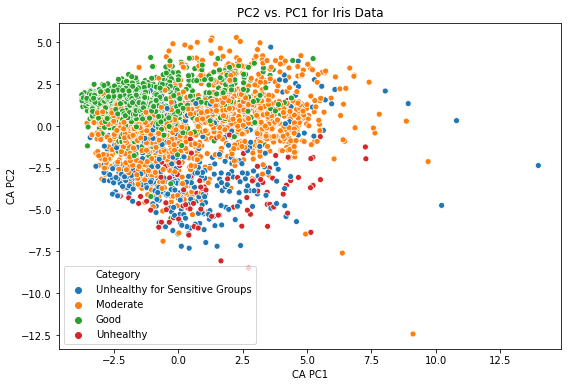

In [29]:
# just run this cell
plt.figure(figsize = (9, 6))
plt.title("PC2 vs. PC1 for Iris Data")
plt.xlabel("CA PC1")
plt.ylabel("CA PC2")
sns.scatterplot(x = ca_2d[:, 0], y = ca_2d[:, 1], hue = ca_target);

What do I observe about this plot? It looks like they might be clustered but not in an obvious way. It appears as if PC2 divides the hazard groups. Positive PC2 means more healthy and negative pc2 means less healthy. Suprisingly unclear meaning of pc1

## Make a Scree plot

In [30]:
ca_total_variance = sum(np.var(ca_standardized, axis=0))

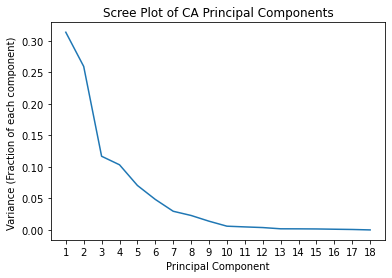

In [36]:
# your plot here
plt.xticks(list(range(1,19)))
plt.xlabel("Principal Component")
plt.ylabel("Variance (Fraction of each component) ")
plt.title("Scree Plot of CA Principal Components")
plt.plot(list(range(1,19)),(np.square(s)/ca_standardized.shape[0])/ca_total_variance)
plt.show()

From this plot we can see that the first principal component makes up 30% of the variance and the second makes up about 25% of the variance and all the rest are just around 10% or less of the variance

In [37]:
## Try Logistic Regression